In [1]:
import pandas as pd
import seaborn as sns

In [4]:
corona = pd.read_csv("corona.csv")

In [5]:
investor = pd.read_csv("kospi_investors_all.csv")

In [7]:
investor.shape, corona.shape

((402, 6), (590, 3))

In [8]:
investor.head()

,날짜,기관합계,기타법인,개인,외국인합계,전체
0,2020-01-20,-27825198443,19026812177,-54680450089,63478836355,0
1,2020-01-21,-185315141286,29582482280,360516680460,-204784021454,0
2,2020-01-22,288502898518,3174452321,-218208500336,-73468850503,0
3,2020-01-23,-479548069609,31587882970,581324527923,-133364341284,0
4,2020-01-28,-189417830401,47013888043,667155598342,-524751655984,0


### corona와 investor 파일 병합

In [10]:
dat_all = investor.merge(corona, left_on='날짜', right_on='일자')
dat_all.head(3)

,날짜,기관합계,기타법인,개인,외국인합계,전체,Unnamed: 0,일자,계(명)
0,2020-01-20,-27825198443,19026812177,-54680450089,63478836355,0,0,2020-01-20,1
1,2020-01-21,-185315141286,29582482280,360516680460,-204784021454,0,1,2020-01-21,0
2,2020-01-22,288502898518,3174452321,-218208500336,-73468850503,0,2,2020-01-22,0


### 필요한 columns 만 가져옴

In [11]:
dat_all = dat_all[['날짜','기관합계','개인','외국인합계','계(명)']]
dat_all.head()

,날짜,기관합계,개인,외국인합계,계(명)
0,2020-01-20,-27825198443,-54680450089,63478836355,1
1,2020-01-21,-185315141286,360516680460,-204784021454,0
2,2020-01-22,288502898518,-218208500336,-73468850503,0
3,2020-01-23,-479548069609,581324527923,-133364341284,0
4,2020-01-28,-189417830401,667155598342,-524751655984,0


### 기관 - 코로나확진자 상관계수

In [12]:
dat_all[['기관합계','계(명)']].corr()

,기관합계,계(명)
기관합계,1.000000,0.015162
계(명),0.015162,1.000000


## 개인 -  코로나확진자 상관계수

In [13]:
dat_all[['개인','계(명)']].corr()

,개인,계(명)
개인,1.000000,0.084447
계(명),0.084447,1.000000


### 외국인 - 코로나확진자 상관계수

In [14]:
dat_all[['외국인합계','계(명)']].corr()

,외국인합계,계(명)
외국인합계,1.000000,-0.117816
계(명),-0.117816,1.000000


## 개인 - 코로나확진자 상관관계 그래프

C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47749 missing from cur

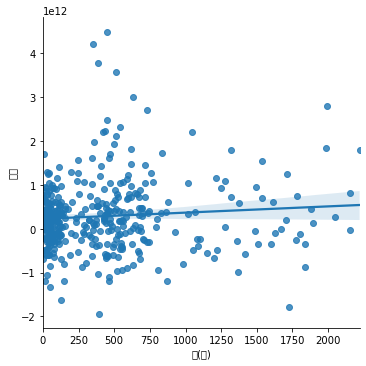

In [15]:
sns.lmplot(x = "계(명)", y = "개인", data = dat_all)

### 20년1분기 데이터

In [23]:
dat_all_20_1 = dat_all[0:50]
dat_all_20_1

,날짜,기관합계,개인,외국인합계,계(명)
0,2020-01-20,-27825198443,-54680450089,63478836355,1
1,2020-01-21,-185315141286,360516680460,-204784021454,0
2,2020-01-22,288502898518,-218208500336,-73468850503,0
3,2020-01-23,-479548069609,581324527923,-133364341284,0
4,2020-01-28,-189417830401,667155598342,-524751655984,0
5,2020-01-29,-497605225625,372657488045,101184539150,0
6,2020-01-30,-442725449395,663228163087,-278759369045,3
7,2020-01-31,171695852050,278755703131,-425024037117,4
8,2020-02-03,169772629693,118014240745,-307932999470,0
9,2020-02-04,-701979533792,202618717290,486279317067,1


### 20년2분기 데이터

In [24]:
dat_all_20_2 = dat_all[50:111]
dat_all_20_2

,날짜,기관합계,개인,외국인합계,계(명)
50,2020-04-01,-619914062375,1150755681995,-575191824250,101
51,2020-04-02,359902579736,270032105559,-623319508843,89
52,2020-04-03,-83304988529,348684914381,-288265705409,86
53,2020-04-06,1036094436023,-843017214655,-201917310769,47
54,2020-04-07,32868874331,149230047248,-195110587313,47
...,...,...,...,...,...
106,2020-06-24,-390261651635,-7258459430,349953076860,51
107,2020-06-25,-1045471767908,1301257996361,-276357266303,28
108,2020-06-26,-164743543196,53307786082,61628609456,39
109,2020-06-29,-351837187727,575173445882,-228661053830,42


### 20년3분기 데이터

In [26]:
dat_all_20_3 = dat_all[111:175]
dat_all_20_3

,날짜,기관합계,개인,외국인합계,계(명)
111,2020-07-01,150777308730,8797460835,-163970894681,51
112,2020-07-02,216311962565,-213346218143,-11616153709,54
113,2020-07-03,106768206848,-88357891202,11871145849,61
114,2020-07-06,623176899208,-361022041527,-257382687585,48
115,2020-07-07,-459366132436,857867310326,-391500096703,44
...,...,...,...,...,...
170,2020-09-23,-280441773714,325210007216,-57718864950,110
171,2020-09-24,-157074297365,328908664473,-192246020354,125
172,2020-09-25,72755992202,19546954304,-89798153915,114
173,2020-09-28,150210758338,-105578315538,-58912921821,50


### 20년4분기 데이터

In [27]:
dat_all_20_4= dat_all[175:236]
dat_all_20_4

,날짜,기관합계,개인,외국인합계,계(명)
175,2020-10-05,385205690497,-550009337543,173965662928,73
176,2020-10-06,19781764917,-204480463577,172556011712,75
177,2020-10-07,430223933231,-346023285147,-95339328103,114
178,2020-10-08,-614995544716,-165927808651,760359392161,69
179,2020-10-12,84452092533,-235997292897,139242371318,98
...,...,...,...,...,...
231,2020-12-23,301661239065,-385892969496,82921538609,1090
232,2020-12-24,629655107873,-803106779612,119237494352,985
233,2020-12-28,830307875068,-946020028718,78012525475,806
234,2020-12-29,-1973366181947,2196938565536,-310625348053,1044


### 21년1분기 데이터

In [30]:
dat_all_21_1 = dat_all[236:296]
dat_all_21_1

,날짜,기관합계,개인,외국인합계,계(명)
236,2021-01-04,-1189876714363,1031014166618,89697391137,1020
237,2021-01-05,-536265643081,728387733108,-208220599741,714
238,2021-01-06,-1369155503764,1729261196142,-397475822573,838
239,2021-01-07,1033917002121,-1183634539101,113375307173,869
240,2021-01-08,-1147931424901,-559141825960,1643477097660,674
241,2021-01-11,-3743203896260,4492145003867,-717613160366,451
242,2021-01-12,-1723898682006,2312445113552,-618935309579,537
243,2021-01-13,-372450411172,169086090692,193496162646,561
244,2021-01-14,-1428981445508,712730906649,677507176342,524
245,2021-01-15,-1414745885546,2113924037705,-753622445831,512


### 21년2분기 데이터

In [31]:
dat_all_21_2 = dat_all[296:359]
dat_all_21_2

,날짜,기관합계,개인,외국인합계,계(명)
296,2021-04-01,-161660852645,-415474481220,574756082222,551
297,2021-04-02,371463579042,-948754787862,563416669238,557
298,2021-04-05,-381209381715,212854400002,170579094464,473
299,2021-04-06,-513328684602,-37849150779,581684221922,477
300,2021-04-07,-326710873264,-21869968117,324188794995,668
...,...,...,...,...,...
354,2021-06-24,134903993235,-45855258991,-102828577840,610
355,2021-06-25,588470416473,-818965236964,245126007676,634
356,2021-06-28,-305504671326,398827184256,-84884266491,501
357,2021-06-29,-892893846220,1232045183643,70772217626,595


### 21년3분기 데이터

In [56]:
dat_all_21_3 = dat_all[359:]
dat_all_21_3

,날짜,기관합계,개인,외국인합계,계(명)
359,2021-07-01,-830310113957,1266028348912,-405643340198,761
360,2021-07-02,-222565849526,353406255563,-121237177607,825
361,2021-07-05,263400908083,-263258792469,779970922,711
362,2021-07-06,69615076407,-292937500751,223965729000,746
363,2021-07-07,-834558496105,1163142534699,-338164714070,1211
364,2021-07-08,-625528407266,1094193541867,-498539945492,1275
365,2021-07-09,-508348999024,1800553898822,-1333196984129,1316
366,2021-07-12,218299274458,-229572111993,39363126216,1100
367,2021-07-13,306098415000,-562048646851,271260082323,1150
368,2021-07-14,-315851648118,605649568248,-272582067189,1613


### (20년1분기) 개인투자자 거래량 - 코로나 확진자 상관관계

In [39]:
dat_all_20_1[['개인','계(명)']].corr()

,개인,계(명)
개인,1.000000,0.249269
계(명),0.249269,1.000000


### (20년2분기) 개인투자자 거래량 - 코로나 확진자 상관관계

In [40]:
dat_all_20_2[['개인','계(명)']].corr()

,개인,계(명)
개인,1.000000,0.041637
계(명),0.041637,1.000000


### (20년3분기) 개인투자자 거래량 - 코로나 확진자 상관관계

In [41]:
dat_all_20_3[['개인','계(명)']].corr()

,개인,계(명)
개인,1.000000,0.132352
계(명),0.132352,1.000000


### (20년4분기) 개인투자자 거래량 - 코로나 확진자 상관관계

In [42]:
dat_all_20_4[['개인','계(명)']].corr()

,개인,계(명)
개인,1.00000,0.19545
계(명),0.19545,1.00000


### (21년1분기) 개인투자자 거래량 - 코로나 확진자 상관관계

In [43]:
dat_all_21_1[['개인','계(명)']].corr()

,개인,계(명)
개인,1.000000,0.062884
계(명),0.062884,1.000000


### (21년2분기) 개인투자자 거래량 - 코로나 확진자 상관관계

In [44]:
dat_all_21_2[['개인','계(명)']].corr()

,개인,계(명)
개인,1.000000,0.176839
계(명),0.176839,1.000000


In [52]:
import pandas as pd
import seaborn as sns
import platform
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt

In [53]:
dat_all_in = dat_all[['날짜','개인']]
dat_all_in

,날짜,개인
0,2020-01-20,-54680450089
1,2020-01-21,360516680460
2,2020-01-22,-218208500336
3,2020-01-23,581324527923
4,2020-01-28,667155598342
...,...,...
397,2021-08-25,-26684623729
398,2021-08-26,440049831171
399,2021-08-27,-343973114787
400,2021-08-30,-57698476549


### 날짜별 개인투자자 거래량 그래프

<AxesSubplot:xlabel='날짜'>

C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hingu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51676 missing from cur

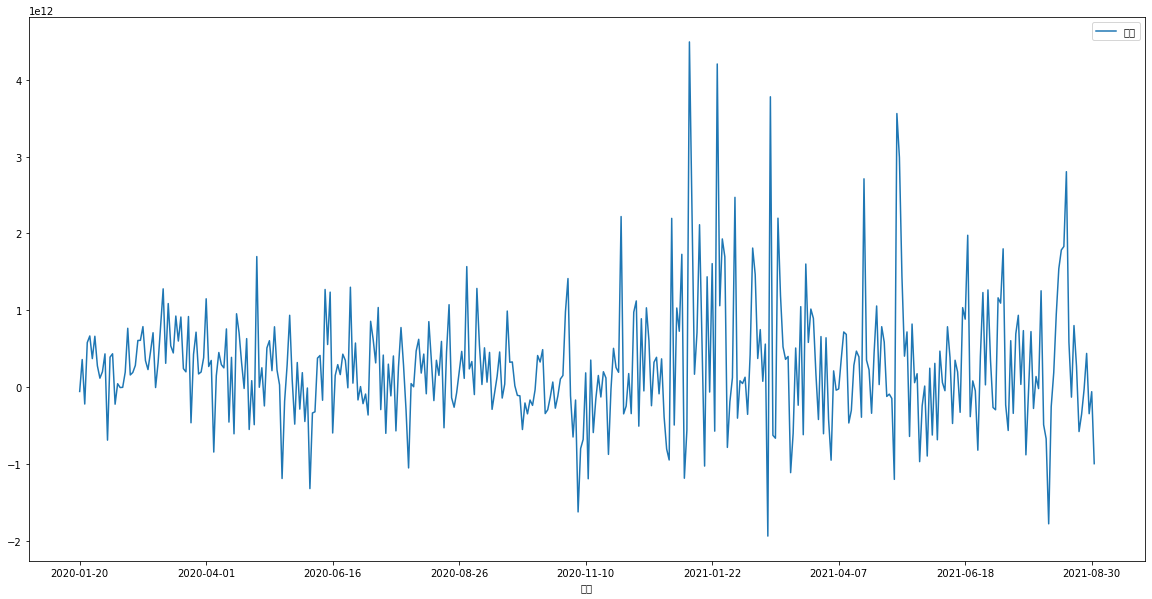

In [55]:
plt.rcParams["figure.figsize"] = (20, 10)
dat_all_in.plot(x = '날짜', y = '개인')